In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Go Pro Hero 10 parameters
gp_pixel_pitch_mm = 1.12e-3
gp_sensor_width_px = 5663
gp_focal_length_mm = 3

# Lucid Triton parameters
pixel_pitch_mm = 2.4e-3
focal_length_mm = 12
sensor_width_px = 5472

# Intel Realsense parameters
rs_pixel_pitch_mm = 3e-3
rs_focal_length_mm = 1.93
rs_sensor_width_px = 1280

# OAK-D parameters

target_size_mm = 50
target_depth_mm = 2500
target_size_px = (focal_length_mm * target_size_mm)/(pixel_pitch_mm * target_depth_mm)
rs_target_size_px = (rs_focal_length_mm * target_size_mm)/(rs_pixel_pitch_mm * target_depth_mm)
gp_target_size_px = (gp_focal_length_mm * target_size_mm)/(gp_pixel_pitch_mm * target_depth_mm)

We know that depth can be calculated by the following equation: 
$$z = \frac{fB}{xw},$$
where $f$ is the focal length, $B$ is the baseline disparity, $x$ is disparity of the feature in the image in pixels, and $w$ is the pixel pitch (equivalent to the width of a single pixel assuming no dead space in between). 

We can use this to calculate the length of an object given the size $p$ (in pixels) it occupies on the image: 

$$l = \frac{zpw}{f} = \frac{Bp}{x}.$$

We also know the depth resolution: 
$$\frac{\partial z}{\partial x} = -\frac{Bf}{wx^2} = -\frac{wz^2}{fB}$$

We can use this to approximate length error: 
$$l - l' = l - \frac{(z + \frac{\partial z}{\partial x})pw}{f}$$



In [74]:
baseline_mm = np.linspace(50,500, num=256)
depth_error = - pixel_pitch_mm * target_depth_mm**2 / (focal_length_mm * baseline_mm)
length_err = target_size_mm - ((target_depth_mm + depth_error) * target_size_px * pixel_pitch_mm)/focal_length_mm

rs_depth_error = -rs_pixel_pitch_mm * target_depth_mm**2 / (rs_focal_length_mm * baseline_mm)
rs_length_err = target_size_mm - ((target_depth_mm + rs_depth_error) * rs_target_size_px * rs_pixel_pitch_mm)/rs_focal_length_mm

gp_depth_error = -gp_pixel_pitch_mm * target_depth_mm**2 / (gp_focal_length_mm * baseline_mm)
gp_length_err = target_size_mm - ((target_depth_mm + gp_depth_error) * gp_target_size_px * gp_pixel_pitch_mm)/rs_focal_length_mm

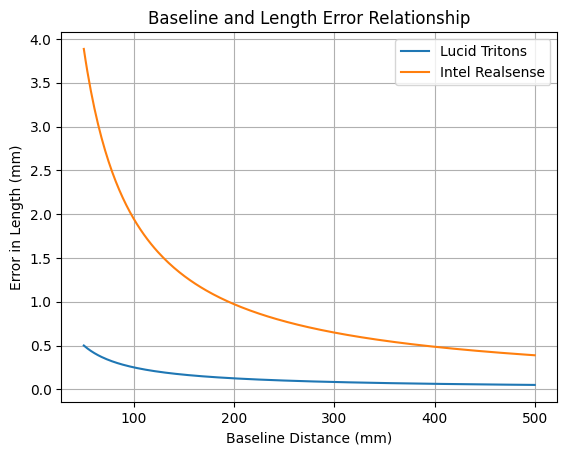

In [75]:
plt.plot(baseline_mm, length_err, label="Lucid Tritons")
plt.plot(baseline_mm, rs_length_err, label="Intel Realsense")
plt.legend()
plt.xlabel("Baseline Distance (mm)")
plt.ylabel("Error in Length (mm)")
plt.title(f"Baseline and Length Error Relationship")
plt.grid()